In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
upload = files.upload()

Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (1).csv


In [ ]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
print(df.shape)

(10324, 33)


In [ ]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


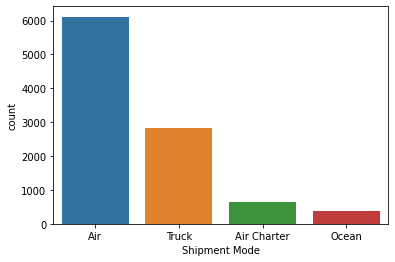

In [ ]:
sns.countplot(df['Shipment Mode'])

**Preprocessing**

In [ ]:
# Dropping ID column
df = df.drop('ID', axis = 1)
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
# Count of missing values in each column
df.isna().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [ ]:
# Dropping rows with missing values in the target column
missing_rows = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_rows, axis = 0).reset_index(drop = True)
df.isna().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1685
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
M

In [ ]:
# Checking the percentage of missing values for other 2 columns so as to see if its worth imputing them
df.isna().mean()

Project Code                    0.000000
PQ #                            0.000000
PO / SO #                       0.000000
ASN/DN #                        0.000000
Country                         0.000000
Managed By                      0.000000
Fulfill Via                     0.000000
Vendor INCO Term                0.000000
Shipment Mode                   0.000000
PQ First Sent to Client Date    0.000000
PO Sent to Vendor Date          0.000000
Scheduled Delivery Date         0.000000
Delivered to Client Date        0.000000
Delivery Recorded Date          0.000000
Product Group                   0.000000
Sub Classification              0.000000
Vendor                          0.000000
Item Description                0.000000
Molecule/Test Type              0.000000
Brand                           0.000000
Dosage                          0.169109
Dosage Form                     0.000000
Unit of Measure (Per Pack)      0.000000
Line Item Quantity              0.000000
Line Item Value 

In [ ]:
# Looking at the 'Dosage' column, we can see that it does not take numeric values, so it is not possible to use mean for imputing them
# Let us check the no. of unique values it takes so as to see if taking the mode is good enough
len(df['Dosage'].unique())

55

In [ ]:
# Imputing the 'Dosage' column with mode
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
df.isna().sum()

Project Code                      0
PQ #                              0
PO / SO #                         0
ASN/DN #                          0
Country                           0
Managed By                        0
Fulfill Via                       0
Vendor INCO Term                  0
Shipment Mode                     0
PQ First Sent to Client Date      0
PO Sent to Vendor Date            0
Scheduled Delivery Date           0
Delivered to Client Date          0
Delivery Recorded Date            0
Product Group                     0
Sub Classification                0
Vendor                            0
Item Description                  0
Molecule/Test Type                0
Brand                             0
Dosage                            0
Dosage Form                       0
Unit of Measure (Per Pack)        0
Line Item Quantity                0
Line Item Value                   0
Pack Price                        0
Unit Price                        0
Manufacturing Site          

In [ ]:
# Looking at the 'Line Item Insurance (USD)' column, we can see that it takes numeric values, so it is possible to use mean for imputing them
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
df.isna().sum()

Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

In [ ]:
# Since the date columns are as objects here, let us see the missing values in it
date_columns = ['PQ First Sent to Client Date',
                'PO Sent to Vendor Date',
                'Scheduled Delivery Date',
                'Delivered to Client Date',
                'Delivery Recorded Date']

for column in date_columns:
  print(column, pd.to_datetime(df[column], errors = 'coerce').isna().mean())

PQ First Sent to Client Date 0.23293857888398234
PO Sent to Vendor Date 0.5436571657968687
Scheduled Delivery Date 0.0
Delivered to Client Date 0.0
Delivery Recorded Date 0.0


In [ ]:
# Dropping date columns with high percentage of missing values
df = df.drop(['PQ First Sent to Client Date',
              'PO Sent to Vendor Date'], axis = 1)

In [ ]:
# Extracting features from the other 3 date columns
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
  df[column] = pd.to_datetime(df[column])
  df[column + '_Day'] = df[column].apply(lambda x : x.day)
  df[column + '_Month'] = df[column].apply(lambda x : x.month)
  df[column + '_Year'] = df[column].apply(lambda x : x.year)
  df = df.drop(column, axis = 1)

df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,...,Line Item Insurance (USD),Scheduled Delivery Date_Day,Scheduled Delivery Date_Month,Scheduled Delivery Date_Year,Delivered to Client Date_Day,Delivered to Client Date_Month,Delivered to Client Date_Year,Delivery Recorded Date_Day,Delivery Recorded Date_Month,Delivery Recorded Date_Year
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,...,241.243885,2,6,2006,2,6,2006,2,6,2006
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,14,11,2006,14,11,2006,14,11,2006
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,...,241.243885,27,8,2006,27,8,2006,27,8,2006
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,1,9,2006,1,9,2006,1,9,2006
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,11,8,2006,11,8,2006,11,8,2006


In [ ]:
for column in df.select_dtypes('object').columns:
  print(column, len(df[column].unique()))

Project Code 142
PQ # 1237
PO / SO # 6013
ASN/DN # 6804
Country 43
Managed By 4
Fulfill Via 2
Vendor INCO Term 8
Shipment Mode 4
Product Group 5
Sub Classification 6
Vendor 72
Item Description 183
Molecule/Test Type 85
Brand 47
Dosage 54
Dosage Form 17
Manufacturing Site 88
First Line Designation 2
Weight (Kilograms) 4563
Freight Cost (USD) 6474


In [ ]:
# We can see that 'Weight (Kilograms)' and 'Freight Cost (USD)' have numeric values also in them, but they have some improper values in them
# Percentage of missing values in them
for column in ['Weight (Kilograms)', 'Freight Cost (USD)']:
  print(df[column].apply(lambda x : x if x.isnumeric() else np.NaN).isna().mean())

0.3818747490967483
0.9614612605379366


In [ ]:
# Dropping 'Weight (Kilograms)' and 'Freight Cost (USD)' columns
df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis = 1)  
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,...,Line Item Insurance (USD),Scheduled Delivery Date_Day,Scheduled Delivery Date_Month,Scheduled Delivery Date_Year,Delivered to Client Date_Day,Delivered to Client Date_Month,Delivered to Client Date_Year,Delivery Recorded Date_Day,Delivery Recorded Date_Month,Delivery Recorded Date_Year
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,...,241.243885,2,6,2006,2,6,2006,2,6,2006
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,14,11,2006,14,11,2006,14,11,2006
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,...,241.243885,27,8,2006,27,8,2006,27,8,2006
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,1,9,2006,1,9,2006,1,9,2006
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,...,241.243885,11,8,2006,11,8,2006,11,8,2006


In [ ]:
for column in df.select_dtypes('object').columns:
  print(column, len(df[column].unique()))

Project Code 142
PQ # 1237
PO / SO # 6013
ASN/DN # 6804
Country 43
Managed By 4
Fulfill Via 2
Vendor INCO Term 8
Shipment Mode 4
Product Group 5
Sub Classification 6
Vendor 72
Item Description 183
Molecule/Test Type 85
Brand 47
Dosage 54
Dosage Form 17
Manufacturing Site 88
First Line Designation 2


In [ ]:
# Dropping columns with high cardinality 
# if not removed then it can easily lead to overfitting and making the model very complex
df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis = 1)
df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,...,Line Item Insurance (USD),Scheduled Delivery Date_Day,Scheduled Delivery Date_Month,Scheduled Delivery Date_Year,Delivered to Client Date_Day,Delivered to Client Date_Month,Delivered to Client Date_Year,Delivery Recorded Date_Day,Delivery Recorded Date_Month,Delivery Recorded Date_Year
0,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",...,241.243885,2,6,2006,2,6,2006,2,6,2006
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",...,241.243885,14,11,2006,14,11,2006,14,11,2006
2,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",...,241.243885,27,8,2006,27,8,2006,27,8,2006
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",...,241.243885,1,9,2006,1,9,2006,1,9,2006
4,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",...,241.243885,11,8,2006,11,8,2006,11,8,2006


In [ ]:
for column in df.select_dtypes(['int64', 'float64']).columns:
  print(column)

Unit of Measure (Per Pack)
Line Item Quantity
Line Item Value
Pack Price
Unit Price
Line Item Insurance (USD)
Scheduled Delivery Date_Day
Scheduled Delivery Date_Month
Scheduled Delivery Date_Year
Delivered to Client Date_Day
Delivered to Client Date_Month
Delivered to Client Date_Year
Delivery Recorded Date_Day
Delivery Recorded Date_Month
Delivery Recorded Date_Year


In [ ]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return ls

In [ ]:
index_list = []
for feature in ['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)']:
  index_list.extend(outliers(df,feature))

In [ ]:
print(index_list)

[1, 5, 17, 21, 43, 44, 52, 58, 60, 73, 75, 84, 89, 93, 94, 95, 97, 99, 106, 107, 115, 123, 144, 145, 146, 152, 184, 194, 208, 214, 215, 216, 229, 241, 267, 269, 274, 275, 284, 286, 329, 361, 364, 367, 391, 392, 396, 425, 481, 483, 490, 494, 498, 502, 557, 565, 567, 576, 587, 595, 596, 600, 601, 602, 603, 606, 607, 609, 611, 615, 616, 620, 626, 635, 638, 640, 657, 665, 666, 674, 677, 678, 679, 692, 711, 716, 719, 720, 721, 722, 723, 725, 734, 736, 752, 760, 785, 814, 815, 820, 821, 825, 827, 829, 837, 850, 855, 902, 903, 906, 907, 911, 915, 934, 938, 941, 944, 952, 955, 956, 969, 973, 977, 979, 984, 992, 1000, 1002, 1011, 1018, 1019, 1032, 1037, 1052, 1065, 1102, 1117, 1118, 1122, 1124, 1125, 1127, 1128, 1134, 1142, 1144, 1148, 1152, 1155, 1159, 1163, 1192, 1193, 1198, 1217, 1228, 1230, 1232, 1248, 1250, 1275, 1282, 1294, 1297, 1299, 1323, 1326, 1341, 1356, 1357, 1366, 1379, 1383, 1391, 1429, 1441, 1447, 1467, 1471, 1474, 1481, 1528, 1535, 1547, 1577, 1580, 1585, 1596, 1599, 1606, 1614,

In [ ]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(index_list)
  return df

In [ ]:
df = remove(df, index_list)

In [ ]:
df.shape

(5831, 772)

In [ ]:
for column in df.select_dtypes('object').columns:
  print(column, len(df[column].unique()))

In [ ]:
# Binary encoding for features with cardinality 2
df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
df['First Line Designation'] = df['First Line Designation'].replace({'Yes': 1, 'No': 0})
df.head()

,Fulfill Via,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date_Day,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
0,0,0,30,19,551.00,29.00,0.97,1,241.243885,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,60,31920,127360.80,3.99,0.07,1,241.243885,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,60,38000,121600.00,3.20,0.05,1,241.243885,11,...,0,0,0,0,0,0,0,0,0,0
6,0,0,90,135,4374.00,32.40,0.36,1,241.243885,8,...,0,0,0,0,0,0,0,0,0,0
7,0,0,60,16667,60834.55,3.65,0.06,1,241.243885,24,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One hot encoding for the other categorical features
for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
  dummies = pd.get_dummies(df[column], prefix = column)
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(column, axis = 1)
df.head()

KeyError: ignored

In [ ]:
# Label encoding the target feature
target_label_encoding = {'Air': 0, 'Truck': 1, 'Air Charter': 2, 'Ocean': 3}
df['Shipment Mode'] = df['Shipment Mode'].replace(target_label_encoding)
df.head()

,Fulfill Via,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date_Day,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
0,0,0,30,19,551.0,29.00,0.97,1,241.243885,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,240,1000,6200.0,6.20,0.03,1,241.243885,14,...,0,0,0,0,0,0,0,0,0,0
2,0,0,100,500,40000.0,80.00,0.80,1,241.243885,27,...,0,0,0,0,0,0,0,0,0,0
3,0,0,60,31920,127360.8,3.99,0.07,1,241.243885,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,60,38000,121600.0,3.20,0.05,1,241.243885,11,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the dataframe into train and test sets
X = df.drop('Shipment Mode', axis = 1)
y = df['Shipment Mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(pd.DataFrame(X_train), 0.9)
len(set(corr_features))

199

In [ ]:
print(corr_features)

{'Manufacturing Site_EY Laboratories, USA', 'Manufacturing Site_Orasure Technologies, Inc USA', 'Country_Belize', 'Dosage_150/300mg+600mg', 'Molecule/Test Type_HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Dosage Form_Tablet - FDC + blister', 'Brand_Colloidal Gold', 'Dosage_30/50/6mg', 'Molecule/Test Type_Chase Buffer, Determine, 100 Tests, 2.5ml x 1 Vial', 'Molecule/Test Type_Malaria Antigen P.f , HRP2, Kit', 'Molecule/Test Type_HIV 1/2, INSTI HIV 1/2 Antibody Kit', 'Manufacturing Site_Bio-Rad Laboratories', 'Molecule/Test Type_HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit', 'Manufacturing Site_Human Diagnostic', 'Vendor INCO Term_DDP', 'Manufacturing Site_MedMira Inc.', 'Molecule/Test Type_Primaquine base (as diphosphate)', 'Molecule/Test Type_HIV 1/2, Uni-Gold HIV Kit', 'Country_Lebanon', 'Molecule/Test Type_Lamivudine/Zidovudine', 'Molecule/Test Type_Malaria Paramax-3 Kit', 'Brand_Hexagon', 'Manufacturing Site_Janssen Ortho LLC, Puerto Rico', 'Country_Congo, DRC', 'Manufacturing S

In [ ]:
# New train and test sets with reduced features
X_train = pd.DataFrame(X_train).drop(corr_features,axis=1);
X_test = pd.DataFrame(X_test).drop(corr_features,axis=1);

print(X_train.shape)
print(X_test.shape)

(6974, 572)
(2990, 572)


In [ ]:
# Scaling the data
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

In [ ]:
# Checking the y_train to see if the data is balanced or not
y_train.value_counts()

0    4255
1    2014
2     445
3     260
Name: Shipment Mode, dtype: int64

In [ ]:
# From above we can see that there is a class imbalance 
# Performing over-sampling to deal with imbalanced data
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After', counter)

Before Counter({0: 4255, 1: 2014, 2: 445, 3: 260})
After Counter({0: 4255, 2: 4255, 3: 4255, 1: 4255})


**Modelling**

In [ ]:
# Function to print various performance metrics
def performance_metrics(X_train, X_test, y_train, y_test, y_pred, model):
  conf_matrix = confusion_matrix(y_test, y_pred, labels = list(target_label_encoding.values()))

#  fig, ax = plt.subplots(figsize=(5, 5))
#  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
#  for i in range(conf_matrix.shape[0]):
#      for j in range(conf_matrix.shape[1]):
#          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.figure(figsize = (7,7))
  sns.heatmap(conf_matrix, annot = True, fmt='g', vmin=0, cmap = 'Blues', cbar = False)
  plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels = list(target_label_encoding.keys()))
  plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels = list(target_label_encoding.keys()))
  plt.xlabel('Predictions')
  plt.ylabel('Actuals')
  plt.title('Confusion Matrix')
  plt.show()

  print('Train Accuracy: %.3f' % model.score(X_train, y_train))
  print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 
  print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
  print('Recall: %.3f' % recall_score(y_test, y_pred, average='macro'))
  print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='macro'))

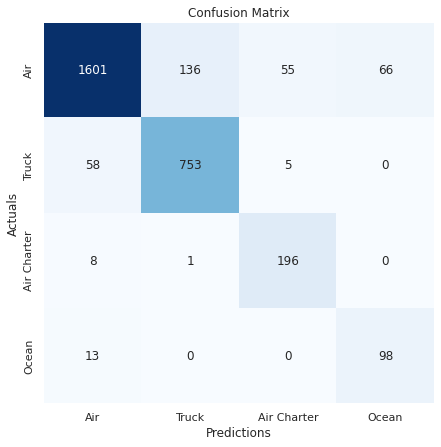

Train Accuracy: 0.955
Test Accuracy: 0.886
Precision: 0.791
Recall: 0.906
F1 Score: 0.838


In [ ]:
# Logistic Regression
lr = LogisticRegression(multi_class = 'multinomial', max_iter = 500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, lr)

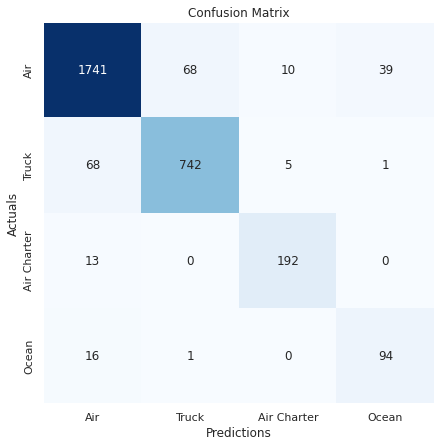

Train Accuracy: 1.000
Test Accuracy: 0.926
Precision: 0.873
Recall: 0.907
F1 Score: 0.888


In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, dtree)

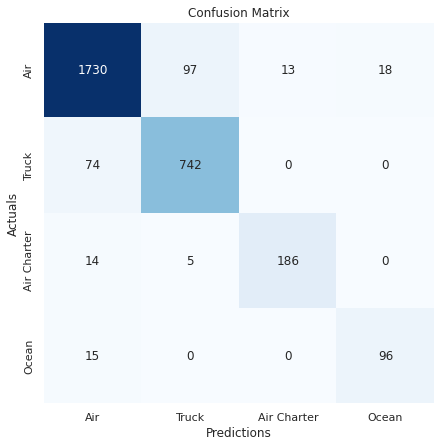

Train Accuracy: 1.000
Test Accuracy: 0.921
Precision: 0.900
Recall: 0.903
F1 Score: 0.901


In [ ]:
# Random Forest
rfm = RandomForestClassifier(random_state = 42)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
performance_metrics(X_train, X_test, y_train, y_test, y_pred, rfm)